<a href="https://colab.research.google.com/github/pasumarthi/pylearn2/blob/master/Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
% matplotlib inline
from google.colab import files
uploaded = files.upload()

MessageError: ignored

In [0]:
Dataset = pd.read_csv('kprototype.csv' )
RequiredData = Dataset.iloc[:, 1:24]

for column in ['Gender','MaritalStatus','Education','Department','JobLevel','Attrition']:
     dummies = pd.get_dummies(RequiredData[column])
     RequiredData[dummies.columns] = dummies

RequiredData = RequiredData.drop(['Gender','MaritalStatus','Education','Department','JobLevel','Attrition'] ,axis = 1) 



In [0]:

RequiredData["left"] = 1



In [0]:
RequiredData= RequiredData.astype("int64")
RequiredData.dtypes


In [0]:
RequiredData.columns

In [0]:
left_count=RequiredData.groupby('left').count()
plt.bar(left_count.index.values, left_count['JobSatisfaction'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()


In [0]:
time_spent=RequiredData.groupby('TotalWorkingYears').count()
plt.bar(time_spent.index.values, time_spent['JobSatisfaction'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

ValueError: ignored

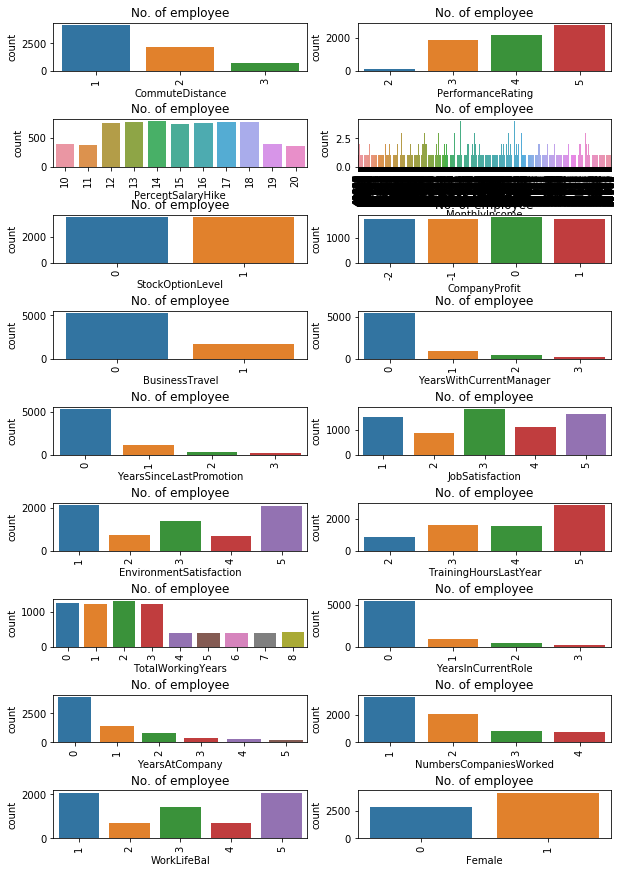

In [0]:
features=['CommuteDistance', 'PerformanceRating', 'PercentSalaryHike',
       'MonthlyIncome', 'StockOptionLevel', 'CompanyProfit', 'BusinessTravel',
       'YearsWithCurrentManager', 'YearsSinceLastPromotion', 'JobSatisfaction',
       'EnvironmentSatisfaction', 'TrainingHoursLastYear', 'TotalWorkingYears',
       'YearsInCurrentRole', 'YearsAtCompany', 'NumbersCompaniesWorked',
       'WorkLifeBal', 'Female', 'Male', 'Married', 'Single', 'Graduate',
       'Under-Graduate', 'Consultancy', 'DevOps', 'Development', 'HR',
       'People Management', 'Product Management', 'Public Relations', 'Sales',
       'Testing', 'Training', 'Associate Developer', 'Developer', 'No', 'Yes',
       'left']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(9, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = RequiredData)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

In [0]:
!apt install libnvrtc8.0
!pip install kmodes


In [0]:
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters=4, init='Cao', verbose=2)
clusters = kproto.fit_predict(RequiredData,categorical=[17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])


In [0]:
RequiredData['Cluster'] =kproto.fit_predict(RequiredData,categorical=[17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])


In [0]:
RequiredData.head(2)


,CommuteDistance,PerformanceRating,PercentSalaryHike,MonthlyIncome,StockOptionLevel,CompanyProfit,BusinessTravel,YearsWithCurrentManager,YearsSinceLastPromotion,JobSatisfaction,EnvironmentSatisfaction,TrainingHoursLastYear,TotalWorkingYears,YearsInCurrentRole,YearsAtCompany,NumbersCompaniesWorked,WorkLifeBal,Female,Male,Married,Single,Graduate,Under-Graduate,Consultancy,DevOps,Development,HR,People Management,Product Management,Public Relations,Sales,Testing,Training,Associate Developer,Developer,No,Yes,left,label,Cluster
0,1,4,12,45776,1,1,1,3,1,5,5,4,7,1,4,1,4,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,2,2
1,1,4,11,57739,0,-1,1,0,0,1,3,5,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1
2,1,4,11,51692,1,-1,1,0,0,5,4,2,3,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,3,3
3,2,4,15,51016,0,0,0,3,1,2,4,3,7,0,4,2,3,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,3,3
4,3,4,12,49934,0,-1,0,0,0,3,2,3,1,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,3,3
